In [136]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt # for visualizing 
import seaborn as sns # for visualizing 
from sklearn.preprocessing import LabelEncoder
from category_encoders import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

## Import Libraries

In [137]:
#show data with read_csv
df = pd.read_csv(r"E:\Faculty\dataset/Bank.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [138]:
# show count of ecah value in all column
for i in df:
    
    print("\n ************ "+i+" ************\n")
    print("\n",df[i].value_counts())
    


 ************ age ************


 31    1551
32    1474
33    1443
35    1417
34    1404
      ... 
17       3
89       2
87       1
91       1
98       1
Name: age, Length: 75, dtype: int64

 ************ job ************


 admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64

 ************ marital ************


 married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64

 ************ education ************


 university.degree      9736
high.school            7596
basic.9y               4826
professional.course    4192
basic.4y               3322
basic.6y               1865
unknown                1397
illiterate               16
Name: education, dtype: int64

 ************ default ************


 no         2

#  Data Cleaning

In [139]:
# replace unknown with NAN
df.replace("unknown", np.nan, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,NaN,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [140]:
# show null value 
df.isnull().sum()

age               0
job             265
marital          65
education      1397
default        6940
housing         796
loan            796
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

In [141]:
# handel null value in column
columns = ["job", "marital", "education", "default", "housing", "loan"]

for col in columns :
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)

In [142]:
# show null after handel 
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

- then found no missing value after handel 

In [143]:
# check the sum of duplicated values
df.duplicated().sum() 

9

In [144]:
# drop the duplicated values
df.drop_duplicates(inplace=True)

In [145]:
# show count of ecah value in all column after handel duplicated and missing values
for i in df:
    
    print("\n ************ "+i+" ************\n")
    print("\n",df[i].value_counts())
    


 ************ age ************


 31    1551
32    1474
33    1442
35    1416
34    1404
      ... 
17       3
89       2
87       1
91       1
98       1
Name: age, Length: 75, dtype: int64

 ************ job ************


 admin.           8576
blue-collar      7440
technician       5398
services         3195
management       2345
retired          1364
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
Name: job, dtype: int64

 ************ marital ************


 married     20011
single       9256
divorced     3674
Name: marital, dtype: int64

 ************ education ************


 university.degree      11128
high.school             7594
basic.9y                4826
professional.course     4191
basic.4y                3322
basic.6y                1864
illiterate                16
Name: education, dtype: int64

 ************ default ************


 no     32938
yes        3
Name: default, dtype: int64

 ************ hous

In [146]:
# show information about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32941 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32941 non-null  int64 
 1   job          32941 non-null  object
 2   marital      32941 non-null  object
 3   education    32941 non-null  object
 4   default      32941 non-null  object
 5   housing      32941 non-null  object
 6   loan         32941 non-null  object
 7   contact      32941 non-null  object
 8   month        32941 non-null  object
 9   day_of_week  32941 non-null  object
 10  duration     32941 non-null  int64 
 11  campaign     32941 non-null  int64 
 12  pdays        32941 non-null  int64 
 13  previous     32941 non-null  int64 
 14  poutcome     32941 non-null  object
 15  y            32941 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.3+ MB


- from information about data found all column is object expeted (age,duration,campaign,pdays,previous)

In [147]:
# show discribe about data
df.describe().style.background_gradient(cmap = 'coolwarm')

,age,duration,campaign,pdays,previous
count,32941.000000,32941.000000,32941.000000,32941.000000,32941.000000
mean,40.013023,258.165660,2.560851,962.042318,0.174767
std,10.403121,258.996865,2.752607,187.975778,0.499084
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [148]:
# create column duration_min to show duration with min
df["duration_min"]=df["duration"]/60
df["duration_min"]

0         3.783333
1         3.366667
2        19.133333
3         2.000000
4         6.133333
           ...    
32945     3.200000
32946     1.066667
32947     2.183333
32948     2.750000
32949     9.066667
Name: duration_min, Length: 32941, dtype: float64

In [149]:
# show discribe about data after create duration_min
df.describe().style.background_gradient(cmap = 'coolwarm')

,age,duration,campaign,pdays,previous,duration_min
count,32941.000000,32941.000000,32941.000000,32941.000000,32941.000000,32941.000000
mean,40.013023,258.165660,2.560851,962.042318,0.174767,4.302761
std,10.403121,258.996865,2.752607,187.975778,0.499084,4.316614
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,1.716667
50%,38.000000,180.000000,2.000000,999.000000,0.000000,3.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,5.316667
max,98.000000,4918.000000,56.000000,999.000000,7.000000,81.966667


## Data visualization

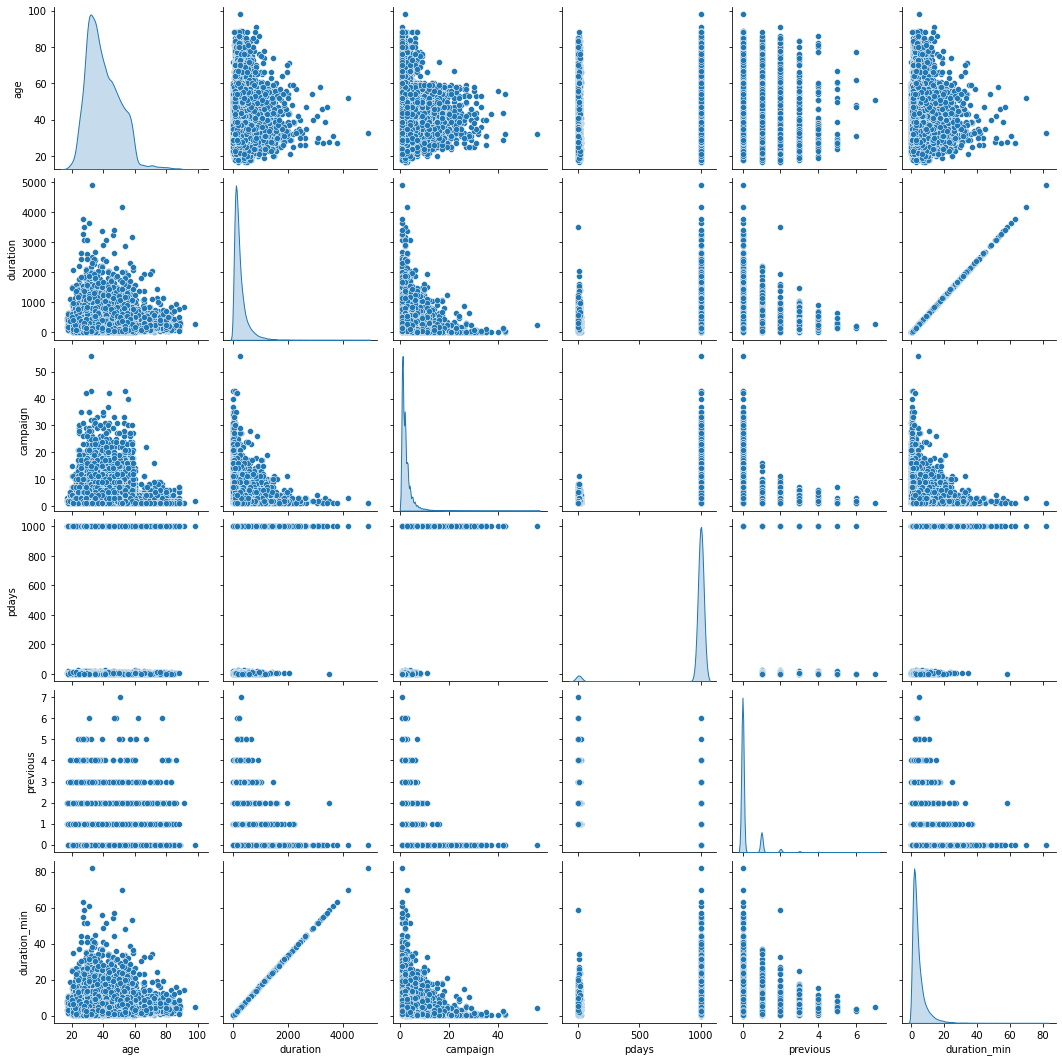

In [150]:
# some vizualization for all column
sns.pairplot(data=df,diag_kind="kde")

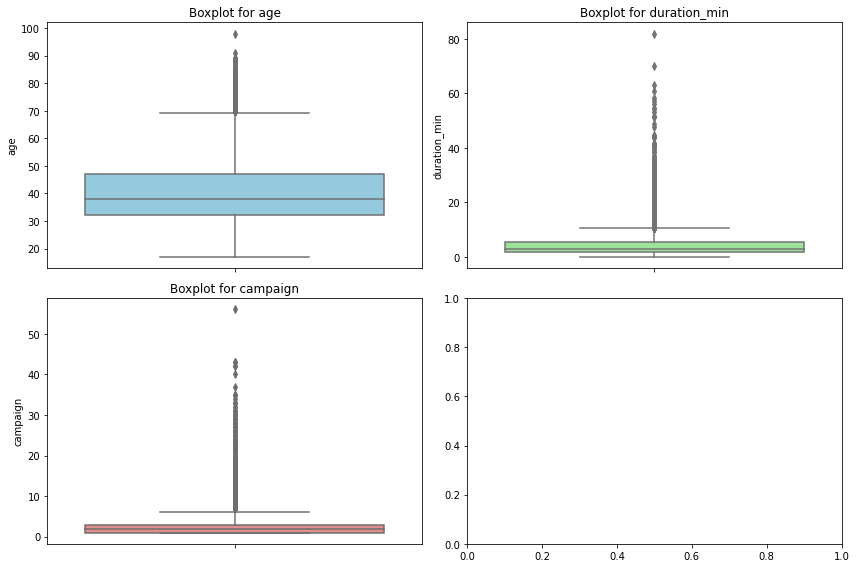

In [151]:
# create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes = axes.flatten()

# Define colors for each boxplot
colors = ['skyblue', 'lightgreen', 'lightcoral']

# create Loop through each column and create boxplot 
for i, (column, color) in enumerate(zip(['age', 'duration_min', 'campaign'], colors)):
    sns.boxplot(y=df[column], ax=axes[i], color=color)
    axes[i].set_title(f'Boxplot for {column}')

# Adjust layout
plt.tight_layout()
plt.show()

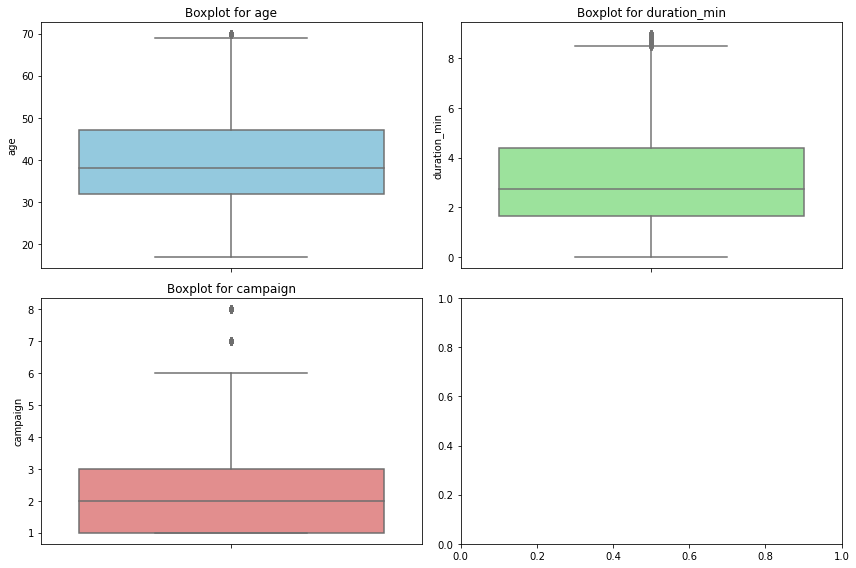

In [155]:
df = df.loc[df["age"] <= 70] # remove negative values and the zero value 
df = df.loc[df["duration_min"] <= 9] # remove zero value 
df = df.loc[df["campaign"] <= 8] 

# Plotting boxplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

# Define colors for each boxplot
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Loop through each column and create boxplot
for i, (column, color) in enumerate(zip(['age', 'duration_min', 'campaign'], colors)):
    sns.boxplot(y=df[column], ax=axes[i], color=color)
    axes[i].set_title(f'Boxplot for {column}')

# Adjust layout
plt.tight_layout()
plt.show()

In [156]:
df.shape

(28227, 17)

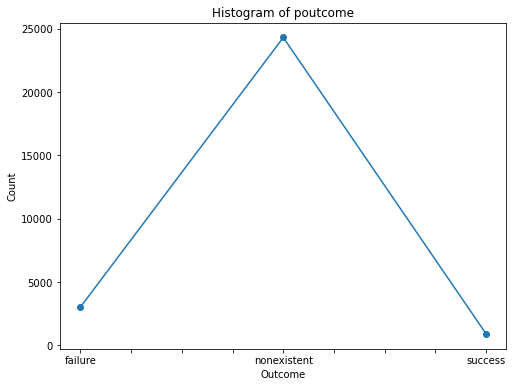

In [157]:
# show line histogram in poutcome col
plt.figure(figsize=(8, 6))
df['poutcome'].value_counts().sort_index().plot(kind='line', marker='o')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Histogram of poutcome')
plt.show()

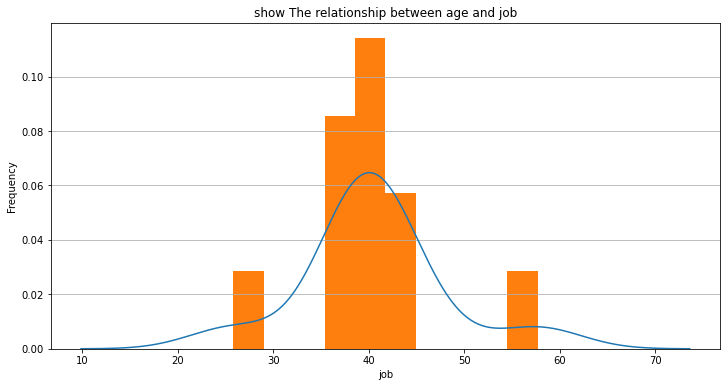

In [160]:
# show The relationship between age and job with subplots
df_line_hist = df.groupby('job')['age'].agg(np.mean)
fig , ax = plt.subplots(figsize=(12,6))
df_line_hist.plot.kde(ax = ax, legend = False, title='show The relationship between age and job');
df_line_hist.plot.hist(density=True,ax = ax)
ax.set_xlabel('job')
ax.grid(axis='y')
plt.show()

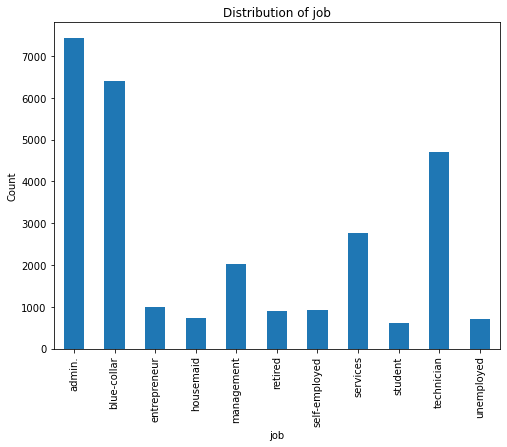

In [161]:
# create plot for job (varaince of jobs)
plt.figure(figsize=(8, 6))
df['job'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('job')
plt.ylabel('Count')
plt.title('Distribution of job')
plt.show()

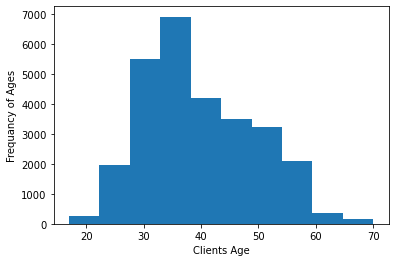

In [162]:
# create plot for Aga (varaince of Ages)
plt.hist(df["age"])
plt.xlabel("Clients Age")
plt.ylabel("Frequancy of Ages");

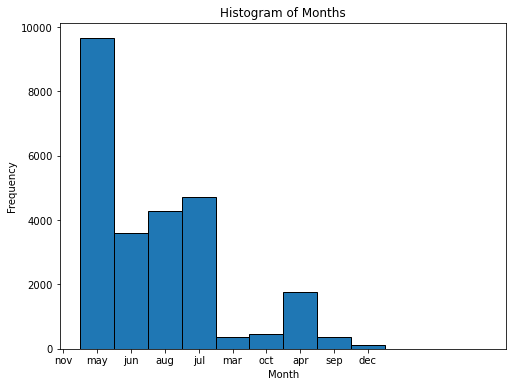

In [163]:
# create the histogram to col month
plt.figure(figsize=(8, 6))
plt.hist(df['month'], bins=range(1, 14), align='left', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Histogram of Months')
plt.show()

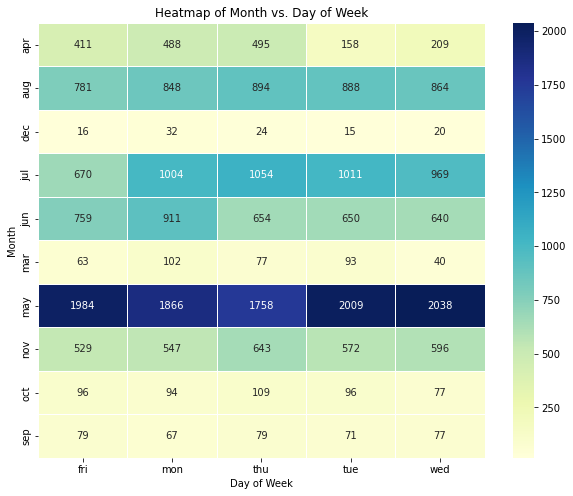

In [164]:
# create heatmap to Month vs. Day of Week

# Create a pivot table to count occurrences of each combination
pivot_table = df.pivot_table(index='month', columns='day_of_week', aggfunc='size', fill_value=0)

# create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', cbar=True, linewidths=.5)
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.title('Heatmap of Month vs. Day of Week')
plt.show()

# preprossing models

- haddel unbalance data and encoder data 

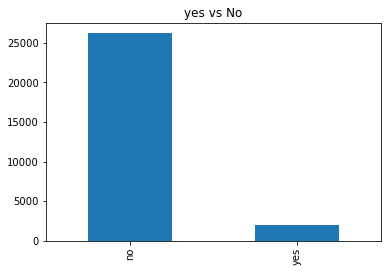

In [165]:
#create plots

df["y"].value_counts().plot(kind="bar", 
                                  title="yes vs No");

In [166]:
df_y0 = df[df["y"] == "no"][5000:7000]
df_y0.shape

(2000, 17)

In [167]:
df_y1 = df[df["y"] == "yes"]
df_y1.shape

(2025, 17)

In [168]:
data = pd.concat([df_y0, df_y1])

In [169]:
data.shape

(4025, 17)

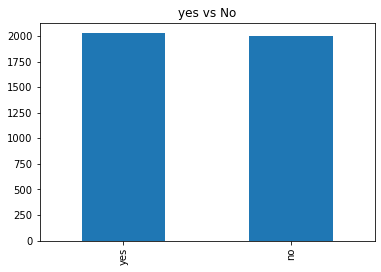

In [170]:
data["y"].value_counts().plot(kind="bar", 
                                  title="yes vs No");

## Encoding the categorical data

In [171]:
data = data.sample(frac=1).reset_index(drop=True)

In [172]:
le=LabelEncoder()
data["y"]=  le.fit_transform(data["y"])

<AxesSubplot:>

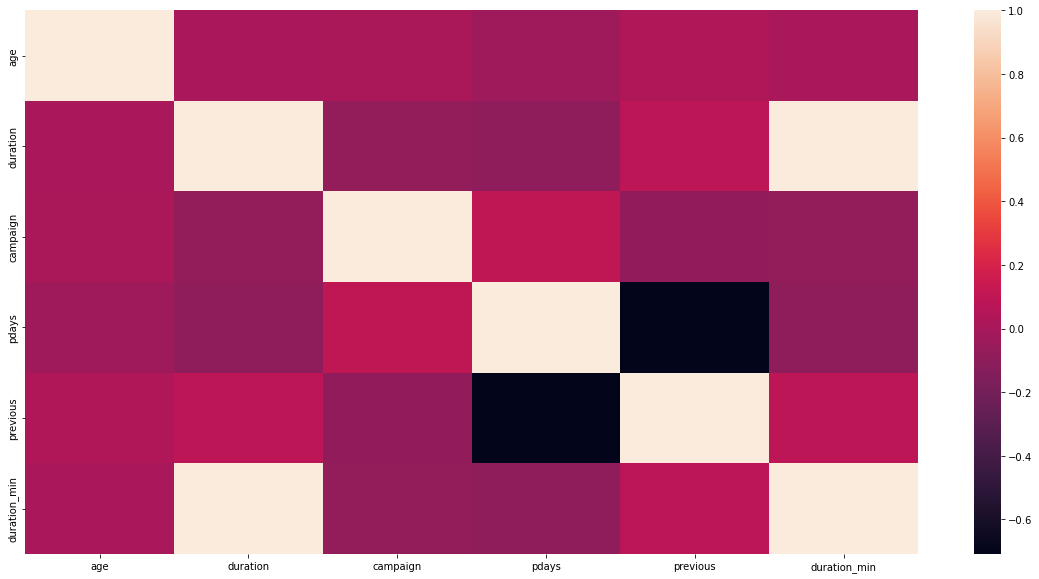

In [173]:
plt.figure(figsize=(20,10))
corr = data.select_dtypes("number").drop(columns= "y").corr()
sns.heatmap(corr)

In [174]:
# delet this column 
data.drop(columns=["poutcome", "pdays", "default", "loan","duration"], inplace=True)

In [175]:
# create encoder for this 
data = pd.get_dummies(data, 
                    columns=["job", "marital", "education", "housing", "contact", "month", "day_of_week"], 
                    drop_first=True)
data.head(20)

,age,campaign,previous,y,duration_min,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,38,3,1,1,5.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,48,2,0,0,3.266667,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,37,1,1,1,5.016667,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,54,1,0,1,6.350000,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,48,1,3,1,5.283333,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,26,5,0,1,2.916667,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6,43,3,0,0,3.550000,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
7,30,2,0,1,3.016667,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,30,1,0,1,4.866667,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
9,34,3,0,1,4.166667,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


## split data 

In [176]:
X = data.drop(columns ="y")
y = data["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [177]:
X.shape

(4025, 37)

## KNN MODEL

Confusion Matrix:
 [[330  99]
 [108 268]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76       429
           1       0.73      0.71      0.72       376

    accuracy                           0.74       805
   macro avg       0.74      0.74      0.74       805
weighted avg       0.74      0.74      0.74       805



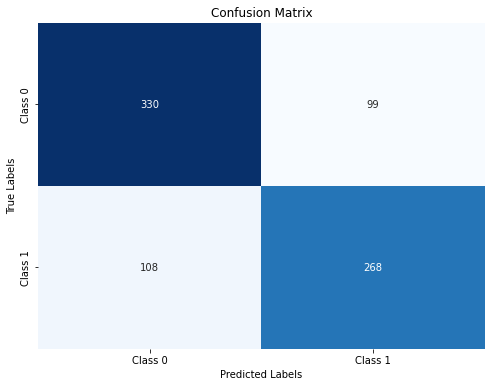

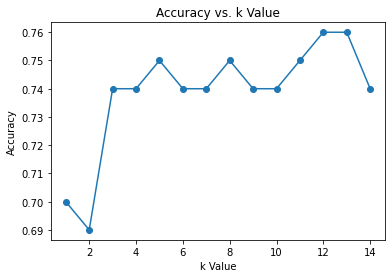

In [178]:
k_values = np.arange(1, 15)
accuracy_values = []


for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    
    y_pred = knn_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy.round(2))
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_report(y_test, y_pred))


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


    
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Accuracy vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.show()

## NN model

In [186]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print('Classification Report:\n', classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)


Epoch 1/20
81/81 [==============================] - 1s 4ms/step - loss: 0.6094 - accuracy: 0.6708 - val_loss: 0.5257 - val_accuracy: 0.7484
Epoch 2/20
81/81 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7714 - val_loss: 0.4398 - val_accuracy: 0.7950
Epoch 3/20
81/81 [==============================] - 0s 2ms/step - loss: 0.4240 - accuracy: 0.8113 - val_loss: 0.4201 - val_accuracy: 0.8199
Epoch 4/20
81/81 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.8203 - val_loss: 0.4037 - val_accuracy: 0.8307
Epoch 5/20
81/81 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8292 - val_loss: 0.4156 - val_accuracy: 0.8028
Epoch 6/20
81/81 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8148 - val_loss: 0.4010 - val_accuracy: 0.8245
Epoch 7/20
81/81 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8214 - val_loss: 0.4013 - val_accuracy: 0.8152
Epoch 8/20
81/81 [==

In [187]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print('Classification Report:\n', classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)


Epoch 1/30
81/81 [==============================] - 1s 3ms/step - loss: 0.6073 - accuracy: 0.7442 - val_loss: 0.4148 - val_accuracy: 0.8043
Epoch 2/30
81/81 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8067 - val_loss: 0.4153 - val_accuracy: 0.8199
Epoch 3/30
81/81 [==============================] - 0s 1ms/step - loss: 0.4164 - accuracy: 0.8218 - val_loss: 0.3994 - val_accuracy: 0.8245
Epoch 4/30
81/81 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8152 - val_loss: 0.4040 - val_accuracy: 0.8183
Epoch 5/30
81/81 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8253 - val_loss: 0.3983 - val_accuracy: 0.8214
Epoch 6/30
81/81 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8304 - val_loss: 0.4257 - val_accuracy: 0.8152
Epoch 7/30
81/81 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8265 - val_loss: 0.4160 - val_accuracy: 0.8043
Epoch 8/30
81/81 [==

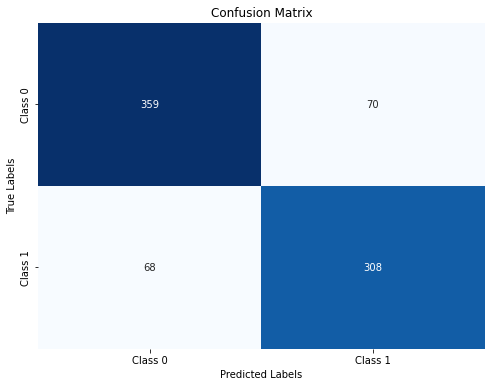

In [188]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression Model

In [189]:
log_model = Pipeline([
    ('classifier', LogisticRegression())
])

log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.2f}")
print('Classification Report:\n', classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(conf_matrix)


Test Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       429
           1       0.81      0.81      0.81       376

    accuracy                           0.82       805
   macro avg       0.82      0.82      0.82       805
weighted avg       0.82      0.82      0.82       805

Confusion Matrix:
[[356  73]
 [ 71 305]]


In [190]:
log_model = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),
    ('classifier', LogisticRegression())
])

log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.2f}")
print('Classification Report:\n', classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(conf_matrix)


Test Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       429
           1       0.78      0.80      0.79       376

    accuracy                           0.80       805
   macro avg       0.80      0.80      0.80       805
weighted avg       0.80      0.80      0.80       805

Confusion Matrix:
[[344  85]
 [ 77 299]]


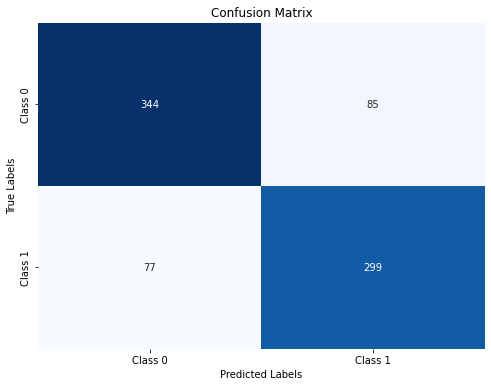

In [191]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Random Forest Model

In [192]:
RandomForestModel = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=30))  
                        ])

RandomForestModel.fit(X_train, y_train)

y_pred = RandomForestModel.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       429
           1       0.82      0.84      0.83       376

    accuracy                           0.84       805
   macro avg       0.84      0.84      0.84       805
weighted avg       0.84      0.84      0.84       805



### with RFE (wrapper technique)

In [193]:
# Replace VarianceThreshold with RFE
RandomForestModel = Pipeline([
    ('feature_selection', RFE(RandomForestClassifier(n_estimators=200, max_depth=30), n_features_to_select=10)),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=30))
])

RandomForestModel.fit(X_train, y_train)

y_pred = RandomForestModel.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       429
           1       0.80      0.82      0.81       376

    accuracy                           0.82       805
   macro avg       0.82      0.82      0.82       805
weighted avg       0.82      0.82      0.82       805



### withVarianceThreshold (filter technique)

In [194]:
RandomForestModel = Pipeline([
    ('feature_selection', VarianceThreshold(threshold=0.1)),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=30))  
                        ])

RandomForestModel.fit(X_train, y_train)

y_pred = RandomForestModel.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       429
           1       0.81      0.84      0.82       376

    accuracy                           0.83       805
   macro avg       0.83      0.83      0.83       805
weighted avg       0.83      0.83      0.83       805



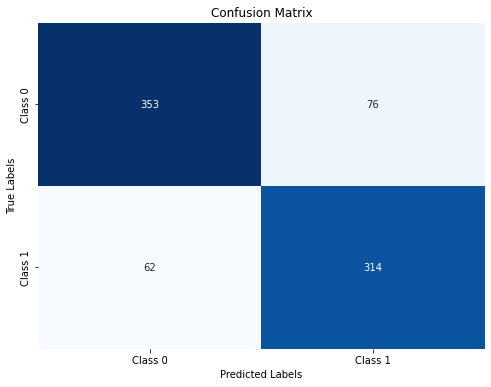

In [195]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree Model

In [196]:
DecisionTreeModel = Pipeline([
    ('classifier', DecisionTreeClassifier(max_depth=10))
])

DecisionTreeModel.fit(X_train, y_train)

y_pred = DecisionTreeModel.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       429
           1       0.77      0.74      0.75       376

    accuracy                           0.77       805
   macro avg       0.77      0.77      0.77       805
weighted avg       0.77      0.77      0.77       805



In [197]:
DecisionTreeModel = Pipeline([
    ('feature_selection', SelectFromModel(DecisionTreeClassifier(max_depth=10))),
    ('classifier', DecisionTreeClassifier(max_depth=10))
])

DecisionTreeModel.fit(X_train, y_train)

y_pred = DecisionTreeModel.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       429
           1       0.78      0.66      0.72       376

    accuracy                           0.75       805
   macro avg       0.76      0.75      0.75       805
weighted avg       0.76      0.75      0.75       805



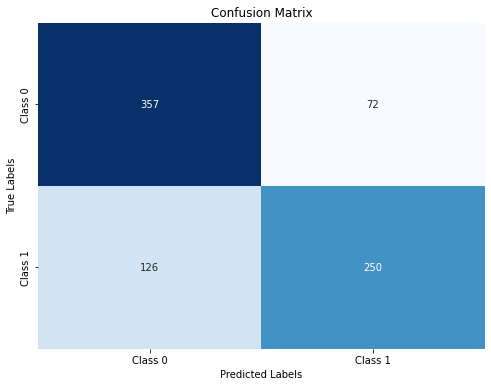

In [198]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Apply OverSampling  

In [199]:
le=LabelEncoder()
df["y"]=  le.fit_transform(df["y"])
df.drop(columns=["poutcome", "pdays", "default", "loan","duration"], inplace=True)
# create encoder for this 
df = pd.get_dummies(df, 
                    columns=["job", "marital", "education", "housing", "contact", "month", "day_of_week"], 
                    drop_first=True)
df.head(20)

,age,campaign,previous,y,duration_min,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,49,4,0,0,3.783333,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,37,2,1,0,3.366667,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,36,2,0,0,2.000000,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,59,2,0,0,6.133333,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
5,29,2,0,0,4.266667,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,26,1,0,1,7.483333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,30,2,0,0,2.100000,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9,33,5,0,0,8.300000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,44,5,0,0,2.633333,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11,32,5,0,0,1.550000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [200]:
X = df.drop(columns ="y")
y = df["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [201]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 200))
sel.fit(X_train, y_train)
sel.get_support()

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False])

In [202]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

6

In [203]:
print(selected_feat)

Index(['age', 'campaign', 'previous', 'duration_min', 'housing_yes',
       'month_mar'],
      dtype='object')


In [204]:
sm = SMOTE(sampling_strategy='auto',random_state=42)
X_res_tr, y_res_tr = sm.fit_resample(X_train, y_train)

In [205]:
DecisionTreeModel = Pipeline([
    ('feature_selection', SelectFromModel(DecisionTreeClassifier(max_depth=10))),
    ('classifier', DecisionTreeClassifier(max_depth=10))
])

DecisionTreeModel.fit(X_res_tr, y_res_tr)

y_pred = DecisionTreeModel.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5247
           1       0.36      0.69      0.47       399

    accuracy                           0.89      5646
   macro avg       0.67      0.80      0.71      5646
weighted avg       0.93      0.89      0.91      5646



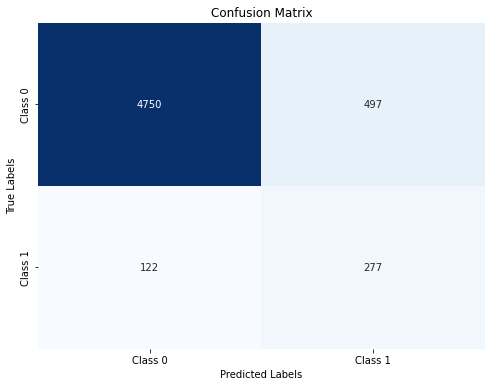

In [206]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [207]:
RandomForestModel = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=200, max_depth=10))),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=10))  
                        ])

RandomForestModel.fit(X_res_tr, y_res_tr)

y_pred = RandomForestModel.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5247
           1       0.36      0.67      0.47       399

    accuracy                           0.89      5646
   macro avg       0.67      0.79      0.70      5646
weighted avg       0.93      0.89      0.91      5646



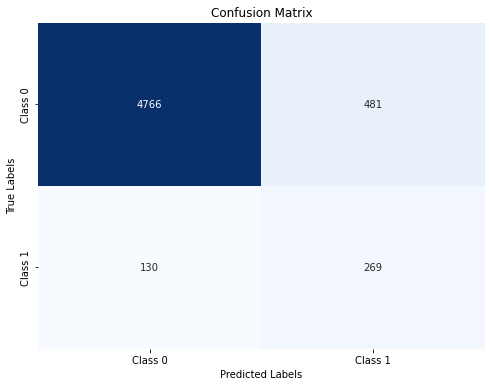

In [208]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()